In [1]:
%matplotlib inline
import pandas as pd
from utils import convert_to_multindex, matrix
import seaborn as sns

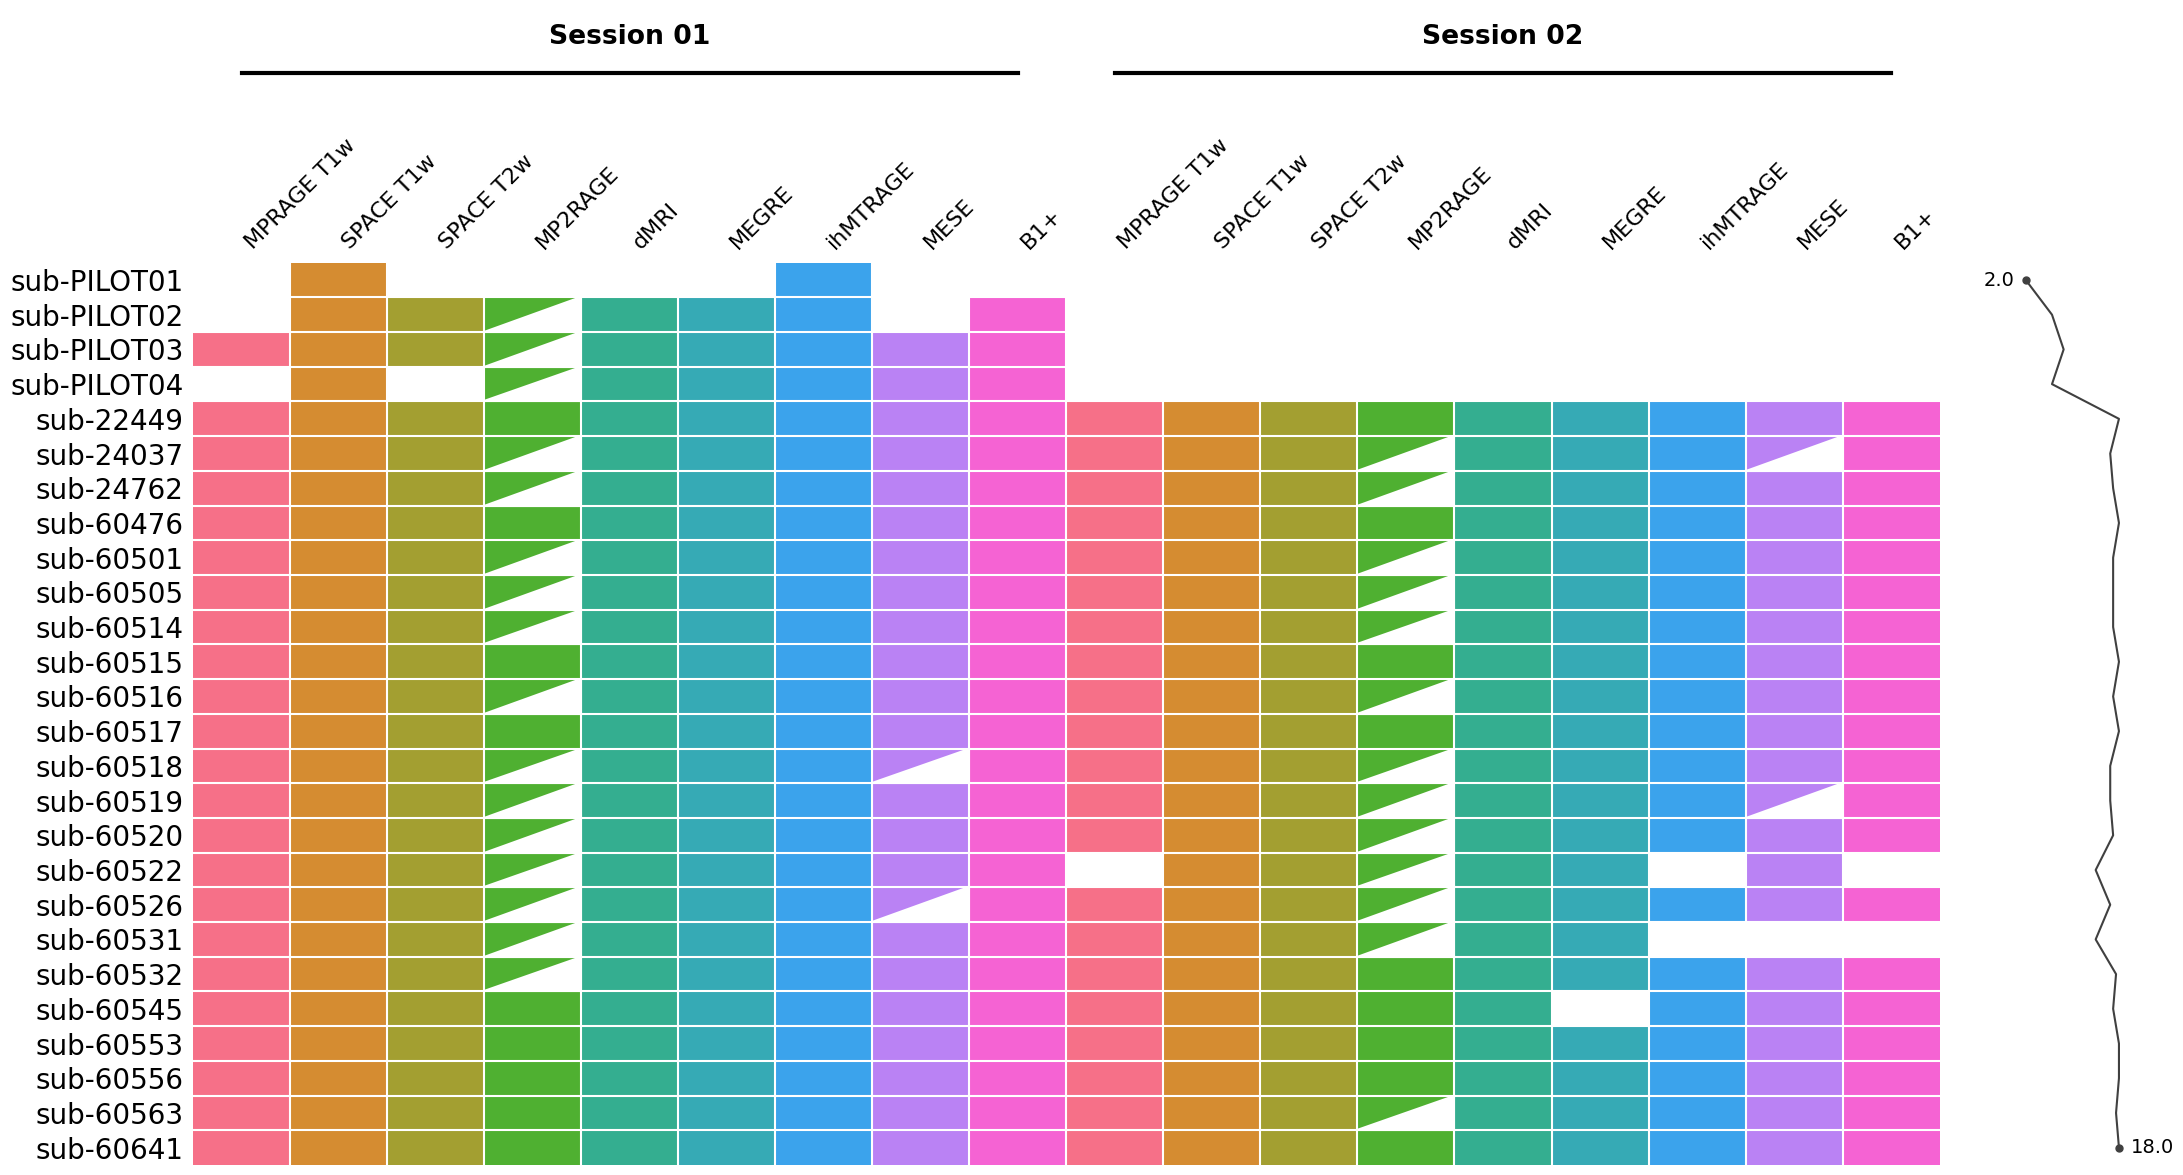

In [2]:
df = pd.read_table('../data/missingness_list.tsv', index_col='participant_id')
df = df.fillna(0)
df['Session 01--MP2RAGE'] = df[['Session 01--MP2RAGE', 'Session 01--MP2RAGE-P']].mean(axis=1)
df['Session 02--MP2RAGE'] = df[['Session 02--MP2RAGE', 'Session 02--MP2RAGE-P']].mean(axis=1)
columns = df.columns.tolist()
columns = [c for c in columns if not c.endswith('MP2RAGE-P')]
df = df[columns]
subjects = df.index.tolist()
pilot_subjects = [subj for subj in subjects if subj.startswith('sub-PILOT')]
other_subjects = [subj for subj in subjects if not subj.startswith('sub-PILOT')]
subjects = pilot_subjects + other_subjects
df = df.loc[subjects]
df = convert_to_multindex(df)
pal = sns.color_palette('husl', 9) * 2
ax = matrix(df, palette=pal)
ax.figure.savefig(
    'missingness.png',
    bbox_inches='tight',
)